In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
! pip install scikit-plot

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import scikitplot as skplt


In [69]:
df = pd.read_csv("/content/drive/MyDrive/Capstone B3/Midterm/OQ.csv") 
df = df.iloc[: , 1:]

df['Quesh_Date'] = pd.to_datetime(df['Quesh_Date'], format='%m/%d/%Y')
df = df.rename({'Quesh_Date': 'Quesh Date'}, axis=1)
df.head(3)

,Quesh,Quesh Date,Avg Rating,Total Respo,Type
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2
2,What form of art fascinates you most?,2022-02-18,4.26,23,2


In [70]:
df2 = pd.read_csv("/content/drive/MyDrive/Capstone B3/Midterm/Sub dataset/sentiment_updated.csv")  
df2.sort_values(by='Quesh Date', ascending=False, inplace=True)
df2 = df2.reset_index(drop=True)
df2.head(3)

,Quesh,Quesh Date,Respo Rating,sent_ans,sent_quesh
0,What is something that you've learned to accept?,2022-02-20,3.782609,1.565217,1.0
1,What was your favorite food growing up and wha...,2022-02-19,4.187500,2.750000,3.0
2,What form of art fascinates you most?,2022-02-18,4.260870,3.043478,3.0


In [71]:
df3 = pd.read_csv("/content/drive/MyDrive/Capstone B3/Midterm/Sub dataset/charcount_updated.csv")
df3.sort_values(by='Quesh Date', ascending=False, inplace=True)
df3 = df3.reset_index(drop=True)
df3.head(3)

,Quesh,Quesh Date,Respo Rating,charcount
0,What is something that you've learned to accept?,2022-02-20,3.782609,113.869565
1,What was your favorite food growing up and wha...,2022-02-19,4.187500,93.437500
2,What form of art fascinates you most?,2022-02-18,4.260870,102.000000


In [72]:
df['Quesh'] = df['Quesh'].astype(str)
df2['Quesh'] = df2['Quesh'].astype(str)
df3['Quesh'] = df3['Quesh'].astype(str)

In [73]:
merged_df = df.merge(df2, how='left', left_index=True, right_index=True)
merged_df.head(3)

,Quesh_x,Quesh Date_x,Avg Rating,Total Respo,Type,Quesh_y,Quesh Date_y,Respo Rating,sent_ans,sent_quesh
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2,What is something that you've learned to accept?,2022-02-20,3.782609,1.565217,1.0
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2,What was your favorite food growing up and wha...,2022-02-19,4.187500,2.750000,3.0
2,What form of art fascinates you most?,2022-02-18,4.26,23,2,What form of art fascinates you most?,2022-02-18,4.260870,3.043478,3.0


In [74]:
merged_df = merged_df.merge(df3, how='left', left_index=True, right_index=True)
merged_df.head(3)

,Quesh_x,Quesh Date_x,Avg Rating,Total Respo,Type,Quesh_y,Quesh Date_y,Respo Rating_x,sent_ans,sent_quesh,Quesh,Quesh Date,Respo Rating_y,charcount
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2,What is something that you've learned to accept?,2022-02-20,3.782609,1.565217,1.0,What is something that you've learned to accept?,2022-02-20,3.782609,113.869565
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2,What was your favorite food growing up and wha...,2022-02-19,4.187500,2.750000,3.0,What was your favorite food growing up and wha...,2022-02-19,4.187500,93.437500
2,What form of art fascinates you most?,2022-02-18,4.26,23,2,What form of art fascinates you most?,2022-02-18,4.260870,3.043478,3.0,What form of art fascinates you most?,2022-02-18,4.260870,102.000000


In [75]:
merged_df.drop(['Quesh Date_y', 'Quesh_y', 'Respo Rating_x', 'Quesh', 'Quesh Date', 'Respo Rating_y'], axis=1, inplace=True)
merged_df.head(3)

,Quesh_x,Quesh Date_x,Avg Rating,Total Respo,Type,sent_ans,sent_quesh,charcount
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2,1.565217,1.0,113.869565
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2,2.750000,3.0,93.437500
2,What form of art fascinates you most?,2022-02-18,4.26,23,2,3.043478,3.0,102.000000


In [76]:
merged_df = merged_df.rename({'Quesh Date_x': 'Quesh Date', 'Quesh_x': 'Quesh'}, axis=1)
merged_df.head(3)

,Quesh,Quesh Date,Avg Rating,Total Respo,Type,sent_ans,sent_quesh,charcount
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2,1.565217,1.0,113.869565
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2,2.750000,3.0,93.437500
2,What form of art fascinates you most?,2022-02-18,4.26,23,2,3.043478,3.0,102.000000


In [77]:
merged_df.to_csv('merged_df.csv', index=False)

Kmeans

In [78]:
# drop date and Type
# If you have binary values, discrete attributes or categorial attributes, 
# stay away from k-means. K-means needs to compute means, and the mean value is not meaningful on this kind of data.
merged_df.drop(['Type'], axis=1, inplace=True)

profile_df = merged_df.copy()

merged_df.drop(['Quesh Date'], axis=1, inplace=True)


In [79]:
merged_df = merged_df.set_index('Quesh')

In [80]:
merged_df.head(3)

,Avg Rating,Total Respo,sent_ans,sent_quesh,charcount
Quesh,,,,,
What is something that you've learned to accept?,3.78,23,1.565217,1.0,113.869565
What was your favorite food growing up and what is it now?,4.19,16,2.750000,3.0,93.437500
What form of art fascinates you most?,4.26,23,3.043478,3.0,102.000000


In [81]:
merged_df.columns = merged_df.columns.str.lower()
merged_df.sample(3)

,avg rating,total respo,sent_ans,sent_quesh,charcount
Quesh,,,,,
"If you were to create a podcast, what would it be about?",4.75,8,4.375000,0.0,94.875000
"What African-American artist, inventor or hero do you admire?",3.86,22,2.045455,5.0,76.227273
Who is someone funny you love?,3.94,17,1.647059,7.0,53.941176


In [82]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg rating,155.0,4.118839,0.348904,3.300000,3.895000,4.12,4.330000,5.000000
total respo,155.0,15.754839,5.608831,5.000000,12.000000,16.00,19.000000,33.000000
sent_ans,155.0,1.872886,1.525725,-1.058824,0.875000,1.60,2.500000,7.400000
sent_quesh,155.0,1.470968,1.600770,-1.000000,0.000000,1.00,3.000000,7.000000
charcount,155.0,67.906394,29.933058,11.578947,46.479167,62.00,84.919786,202.777778


In [83]:
# z score standardizing

from scipy import stats
  
# Z-Score using scipy
merged_df['charcount'] = stats.zscore(merged_df['charcount'])
# merged_df['total respo'] = stats.zscore(merged_df['total respo'])
# merged_df['avg rating	'] = stats.zscore(merged_df['avg rating'])
# merged_df['sent_ans'] = stats.zscore(merged_df['sent_ans'])
# merged_df['sent_quesh'] = stats.zscore(merged_df['sent_quesh'])

In [84]:
KRANGE = range(2,11)
k_dict = {}
k_list = []
for i in KRANGE:
  ki = KMeans(i)
  labs = ki.fit_predict(merged_df)
  k_dict[i] = ki.inertia_ 
  k_list.append(ki.inertia_ )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


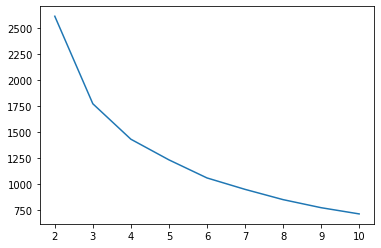

In [85]:
sns.lineplot(KRANGE, k_list)
plt.show()

In [86]:
k_list

[2618.07851472281,
 1774.5573731825143,
 1433.0128222961491,
 1234.1115277392516,
 1059.949359452431,
 949.8590281362297,
 850.8967479763584,
 773.1573364478363,
 713.1880137952821]

In [87]:
# fit our first kmeans cluster
k3 = KMeans(3) # initialize
k3.fit(merged_df) # fit wtih feature matrix

KMeans(n_clusters=3)

In [88]:
labs = k3.predict(merged_df) # predict, output the cluster assignments
labs

array([2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0], dtype=int32)

In [89]:
# how many iterations ran and inertia
print(k3.n_iter_)
print(k3.inertia_)

3
1774.5573731825143


In [90]:
# put these back onto the original dataset
profile_df['k3'] = labs
profile_df.sample(3)

,Quesh,Quesh Date,Avg Rating,Total Respo,sent_ans,sent_quesh,charcount,k3
77,Who is someone you look up to?,2021-12-05,3.64,14,1.285714,0.0,65.500000,1
124,What song(s) can’t you help but sing along to?,2021-10-19,4.91,11,0.909091,2.0,82.636364,0
73,If you were to give away one product to everyo...,2021-12-09,3.92,12,3.333333,0.0,111.583333,0


In [91]:
# lets do our first profile
k3_profile = profile_df.groupby('k3').mean()
k3_profile.T


k3,0,1,2
Avg Rating,4.375435,4.048028,3.940526
Total Respo,9.304348,16.000000,23.105263
sent_ans,1.911192,1.838825,1.890157
sent_quesh,0.913043,1.661972,1.789474
charcount,66.863698,68.610703,67.852660


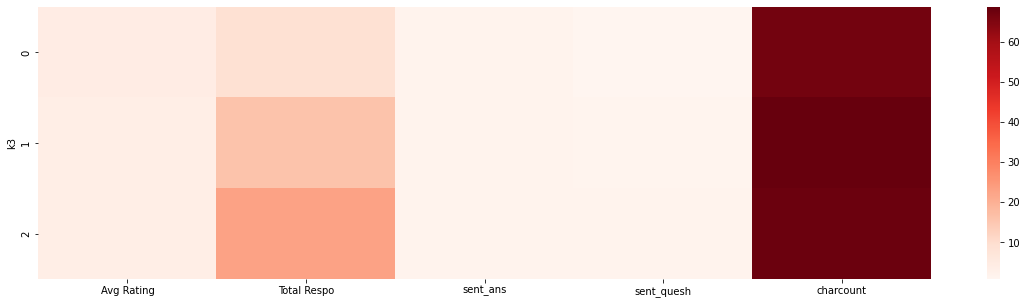

In [92]:
plt.figure(figsize=(20, 5))
sns.heatmap(k3_profile, cmap='Reds')
plt.show()

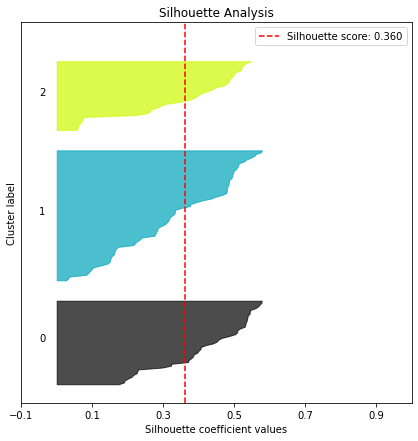

In [93]:
# silo score from sklearn --- metrics module
j = merged_df
silo_overall = metrics.silhouette_score(j, k3.predict(j))
silo_overall


# silo samples
silo_samples = metrics.silhouette_samples(j, k3.predict(j))
type(silo_samples)
silo_samples.shape

# plot up the the fit
skplt.metrics.plot_silhouette(j, k3.predict(j), figsize=(7,7))
plt.show()

